In [339]:
#Importing the Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [340]:
#importing the DataSet 
df=pd.read_csv('Leads.csv')

# Understanding the DataSet


In [341]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [342]:
df.shape

(9240, 37)

In [343]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [345]:
df.duplicated().sum()

0

In [346]:
copy_df=df.copy()

In [347]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [348]:
#Percentage for Null Values
Perc_Null_df=round((df.isnull().sum()*100)/len(df),2) 
Perc_Null_df




Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [349]:
# # Encoding the variables with yes/no labels
# for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
#             ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
#             ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
#            ,'A free copy of Mastering The Interview']:

#     df[feature] = df[feature].replace('Yes',1)
#     df[feature] = df[feature].replace('No',0)
# df.head()

In [350]:
binary_col= ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
             ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
             ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
            ,'A free copy of Mastering The Interview']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in binary_col:
    df[i]=lb.fit_transform(df[i])
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [351]:
for col in df.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(df[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone           

In [352]:
#Converting the select Values into None
for i in df.columns:
    df[i]=df[i].replace('Select',None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,None,None,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,None,None,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,None,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,None,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [353]:
Perc_Null_df=round((df.isnull().sum()*100)/len(df),2) 
Perc_Null_df

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# Handling the Missing Values

In [354]:
#Above we can see their are columns with Null Value but we are considering a threshold value of null value percaentage to be as 70 and above So we are dropping those columns
df = df.drop(df.loc[:,list(Perc_Null_df>70)].columns, 1)

In [355]:
df.shape


(9240, 35)

In [356]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [357]:
# As the Lead Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"

df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

In [358]:
df['Lead Quality'].unique()

array(['Low in Relevance', 'Not Sure', 'Might be', 'Worst',
       'High in Relevance'], dtype=object)

In [359]:
Perc_Null_df=round((df.isnull().sum()*100)/len(df),2) 
Perc_Null_df

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [360]:
#Above we can see that  Lead Quality column was necessary for the intuition but ihas above 50 percent null values which we have converted it with not sure but we are now considering a threshold value of null value percaentage to be as 40 and above So we are dropping those columns
df = df.drop(df.loc[:,list(Perc_Null_df>40)].columns, 1)

In [361]:
df.shape

(9240, 31)

# Filling the Missing Values

In [362]:
df['City'].unique()

array([None, 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [363]:
#Finding the most valued from this categorical data
(df['City'].value_counts()*100)/df.shape[0]

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [364]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
df['City'] = df['City'].replace(np.nan, 'Mumbai')


In [365]:
df['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [366]:
#Finding the most valued from this categorical data
(df['Country'].value_counts()*100)/df.shape[0]

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [367]:
# More than 70% data is of "India" and hence it is safer to impute NULLS with this value
df['Country'] = df['Country'].replace(np.nan, 'India')

In [368]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [369]:
#Finding the most valued from this categorical data
(df['What is your current occupation'].value_counts()*100)/df.shape[0]

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [370]:
# More than 60% data is of "Unemployed" and hence it is safer to impute NULLS with this value
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [371]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [372]:
#Finding the most valued from this categorical data
(df['What matters most to you in choosing a course'].value_counts()*100)/df.shape[0]

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [373]:
# More than 70% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


In [374]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [375]:
#Finding the most valued from this categorical data
(df['Tags'].value_counts()*100)/df.shape[0]

Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In [376]:
# For Tags column, more than 22% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')


In [377]:
df['Specialization'].unique()

array([None, 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [378]:
#Finding the most valued from this categorical data
(df['Specialization'].value_counts()*100)/df.shape[0]

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [379]:
# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
df['Specialization'] = df['Specialization'].replace(np.nan, 'Other_Specialization')


In [380]:
round((df.isnull().sum()*100)/len(df),2) 


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [381]:
df.dropna(inplace=True)

In [382]:
round((df.isnull().sum()*100)/len(df),2) 


Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [383]:
df.shape

(9074, 31)

# Visualising the data

In [384]:
# Lets start with the target variable and see if we have any data imbalance or not 
df["Converted"].value_counts()/df.shape[0]

0    0.621446
1    0.378554
Name: Converted, dtype: float64

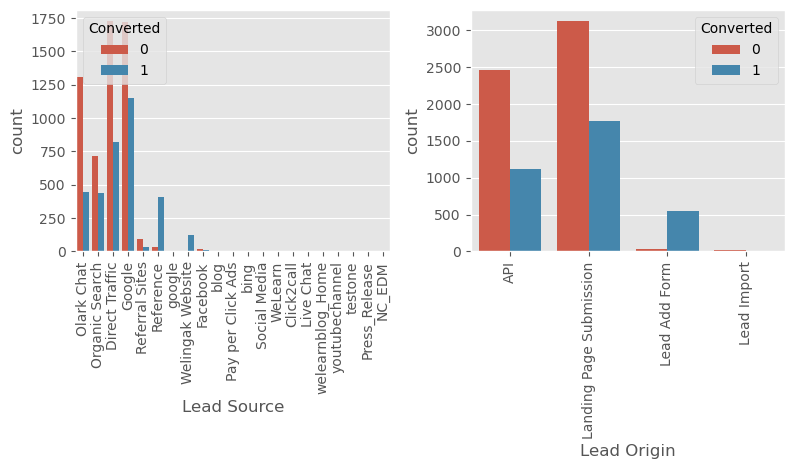

In [385]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(df[feature], hue=df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()
    

In [386]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

df['Lead Source'] = df['Lead Source'].replace("google", 'Google')

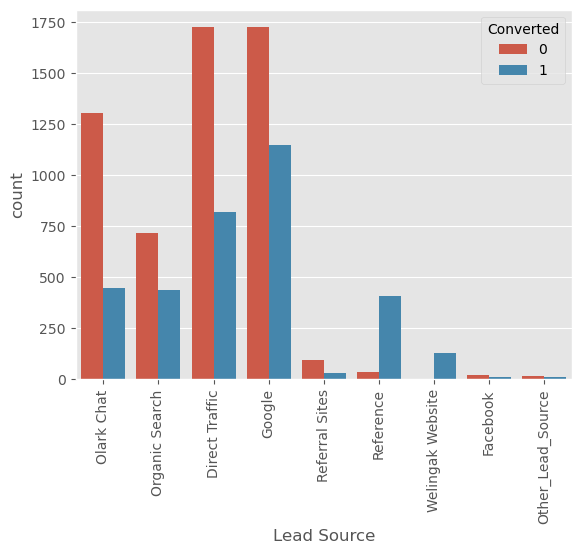

In [387]:
# Plotting Lead Source again
sns.countplot(x="Lead Source", hue="Converted", data=df)
plt.xticks(rotation=90)
plt.show()

In [388]:
# #OBSERVATION:

# API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable
# The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
# Lead Import has very less count as well as conversion rate and hence can be ignored
# To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

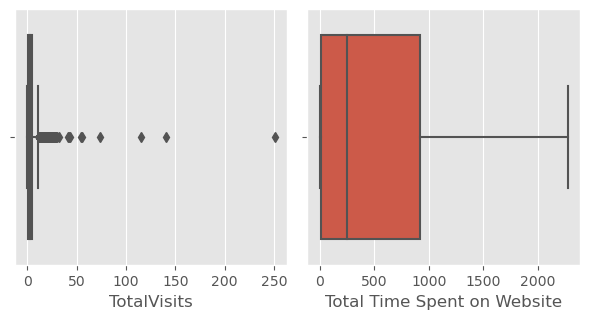

In [389]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df[feature])
    plt.tight_layout()

In [390]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = df["TotalVisits"].quantile(0.95)
df["TotalVisits"][df["TotalVisits"] >= q1] = q1

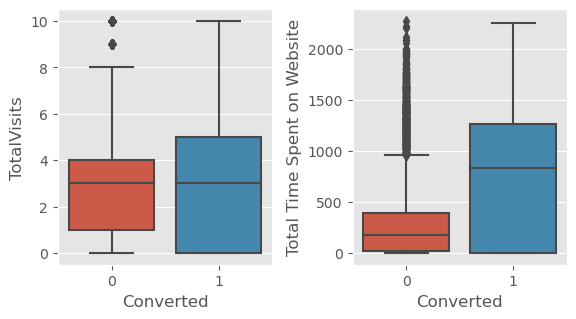

In [391]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = df)
    plt.tight_layout()

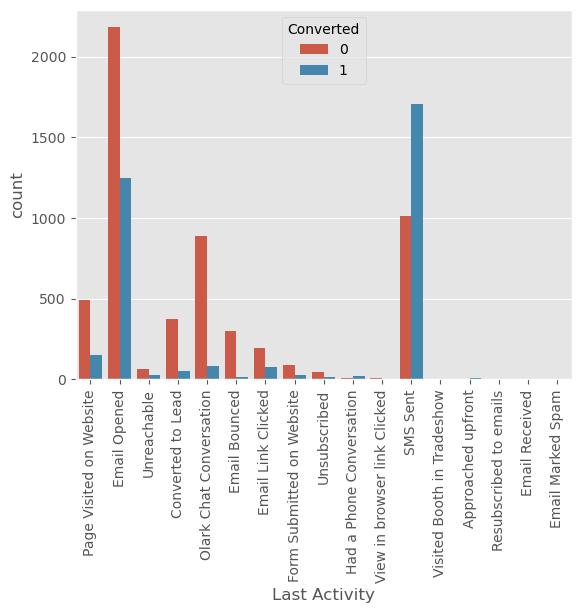

In [392]:
# Plotting the Last Activity again 

sns.countplot(x="Last Activity", hue="Converted", data= df)
plt.xticks(rotation='vertical')
plt.show()

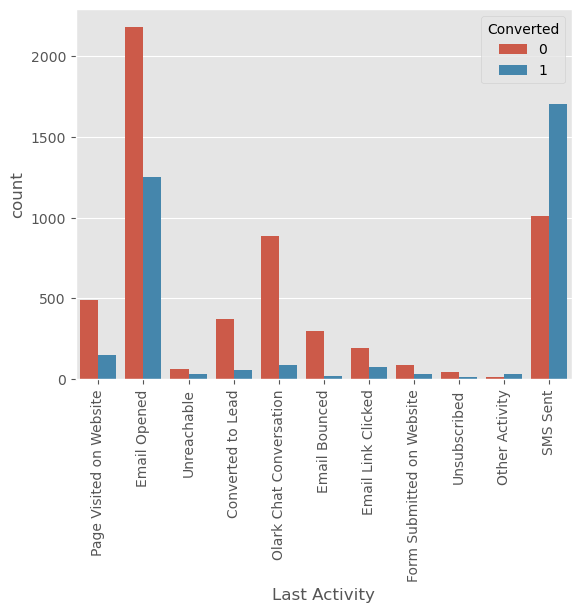

In [393]:
# Converting all the low count categories to the 'Others' category
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

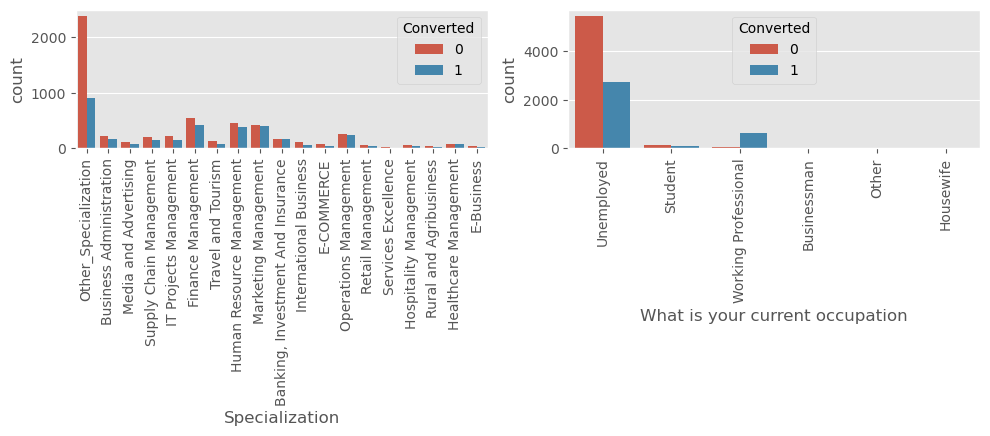

In [394]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

In [395]:
# OBSERVATION:

# Looking at above plot, no particular inference can be made for Specialization
# Looking at above plot, we can say that working professionals have high conversion rate
# Number of Unemployed leads are more than any other category
# To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

# Country, What matters most to you in choosing a course, City columns have most values corresponding to one value
# such as India for Country, Mumbai for city and hence there is no particular insights for these columns

In [396]:
df['What is your current occupation'] = df['What is your current occupation'].replace("Other", 'Other_Occupation')

In [397]:
df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


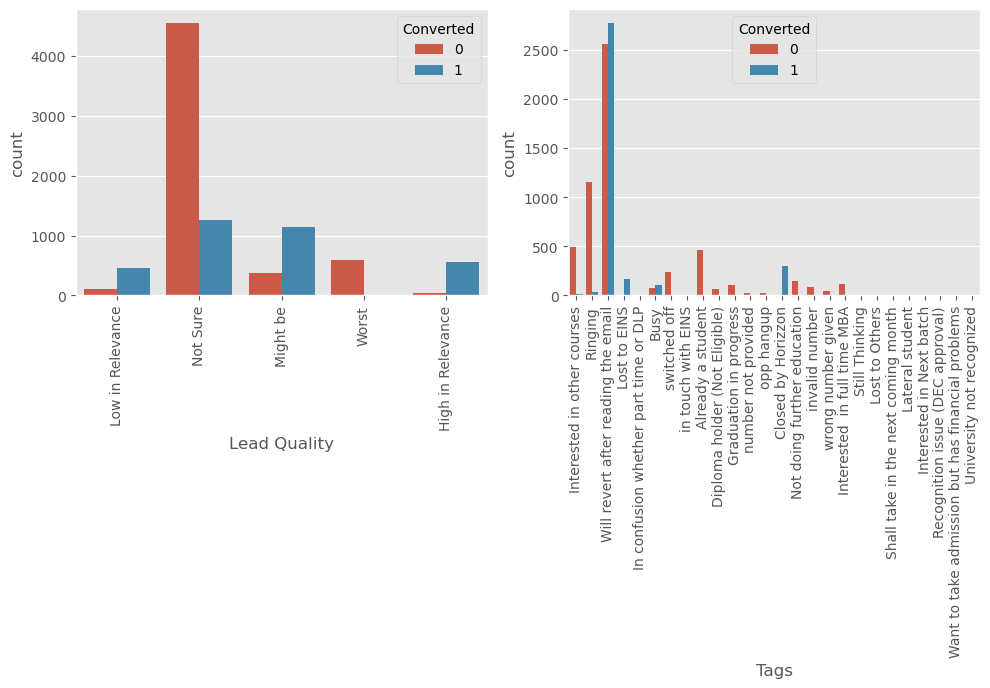

In [398]:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df)
    plt.xticks( rotation=90)
    plt.tight_layout()

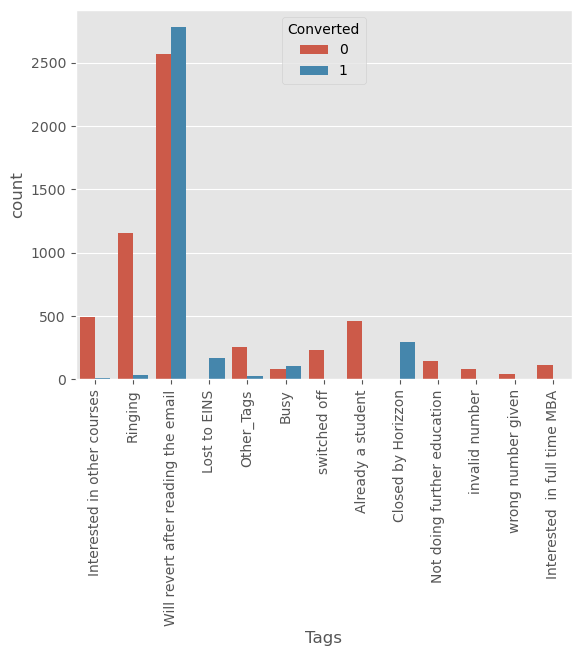

In [399]:
# Converting all low count categories to Others category
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

# Now deleteing the unwanted columns

In [400]:
# Dropping unnecessary columns

df = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [401]:
df.shape

(9074, 15)

In [402]:
df.dtypes

Prospect ID                         object
Lead Origin                         object
Lead Source                         object
Do Not Email                         int32
Converted                            int64
TotalVisits                        float64
Total Time Spent on Website          int64
Page Views Per Visit               float64
Last Activity                       object
Specialization                      object
What is your current occupation     object
Tags                                object
Lead Quality                        object
City                                object
Last Notable Activity               object
dtype: object

In [403]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [404]:
# # To check the correlation among varibles
# plt.figure(figsize=(10,5))
# sns.heatmap(Lead_data.corr())
# plt.show()

In [405]:

df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [406]:
df = pd.concat([df, dummy], axis=1)
df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [425]:
# Putting feature variable to X
x = df.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y = df['Converted']

x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [426]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [427]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)

In [428]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain.iloc[:,1:4] = sc.fit_transform(xtrain.iloc[:,1:4])

xtrain.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
160,0,-0.071614,0.961655,0.298374,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2267,0,-1.147903,-0.886605,-1.125450,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8895,0,-1.147903,-0.886605,-1.125450,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
854,0,0.287149,2.136489,0.772982,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3640,0,0.287149,-0.505974,0.772982,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [411]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(df['Converted'])/df.shape[0])*100)

Conversion rate is  37.85541106458012


In [420]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=100)
model=lg.fit(xtrain,ytrain)

In [421]:
ypred=model.predict(xtest)

In [412]:
# # Correlation between different numerical variables for both the Converted and not-converted cases
# conv_corr = df.corr()

# # Unstacking the correlation matrix to find out top correlations
# conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
# conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

In [422]:
ypred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [423]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(ypred,ytest)
cm

array([[253,  17],
       [891, 654]], dtype=int64)

In [424]:
accuracy_score(ypred,ytest)

0.4997245179063361

In [429]:
# Dropping highly correlated features

xtest = xtest.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
xtrain = xtrain.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [414]:
# conv_corr = xtrain.corr()
# conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

In [430]:
# # Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(ytrain,(sm.add_constant(xtrain)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7181
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1483.2
Date:                Sun, 22 Jan 2023   Deviance:                       2966.3
Time:                        00:21:15   Pearson chi2:                 5.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6016
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3487      1.734      0.778      0.437      -2.049       4.747
Do Not Email                                            -1.1547      0.285     -4.050      0.000      -1.713      -0.596
TotalVisits                                              0.1066      0.078      1.360      0.174      -0.047       0.260
Total Time Spent on Website                              1.0973      0.058     18.983      0.000       0.984       1.211
Page Views Per Visit                                    -0.1480      0.079     -1.878      0.060      -0.303       0.006
Lead Origin_Landing Page Submission                     -0.9629      0.203     -4.754      0.000      -1.360      -0.566
Lead Origin_Lead Add Form                               -0.2091      1.308     -0.160      0.873      -2.773       2.355
Lead Origin_Lead Import                                  0.9002      0.777      1.158      0.247      -0.623       2.424
Lead Source_Google                                       0.1792      0.141      1.275      0.202      -0.096       0.455
Lead Source_Olark Chat                                   0.9853      0.210      4.684      0.000       0.573       1.398
Lead Source_Organic Search                               0.2297      0.190      1.207      0.227      -0.143       0.603
Lead Source_Other_Lead_Source                            0.8316      0.799      1.041      0.298      -0.734       2.397
Lead Source_Reference                                    1.6399      1.358      1.208      0.227      -1.021       4.301
Lead Source_Referral Sites                              -0.0985      0.430     -0.229      0.819      -0.941       0.744
Lead Source_Welingak Website                             5.3754      1.505      3.571      0.000       2.425       8.326
Last Activity_Email Bounced                             -0.5952      0.740     -0.804      0.422      -2.046       0.856
Last Activity_Email Link Clicked                        -0.9065      0.427     -2.121      0.034      -1.744      -0.069
Last Activity_Email Opened                              -0.4042      0.326     -1.241      0.215      -1.043       0.234
Last Activity_Form Submitted on Website                  0.2657      0.555      0.479      0.632      -0.822       1.353
Last Activity_Olark Chat Conversation                   -0.6063      0.367     -1.651      0.099      -1.326       0.114
Last Activity_Other Activity                             1.3822      1.171      1.180      0.238      -0.913       3.678
Last Activity_Page Visited on Website                   -0.4890      0.374     -1.307      0.191      -1.222       0.244
Last Activity_SMS Sent                                   1

In [416]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# # model evaluation
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score
# from sklearn.metrics import precision_recall_curve

In [431]:
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

l= LogisticRegression()
rfe = RFE(estimator = l, n_features_to_select = 15)  
rfe = rfe.fit(xtrain, ytrain)

list(zip(xtrain.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 50),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 49),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Other_Lead_Source', False, 33),
 ('Lead Source_Reference', False, 59),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 27),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Other Activity', False, 7),
 ('Last Activity_Page Visited on Website', False, 26),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 11),


In [418]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor 
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# # model evaluation
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score
# from sklearn.metrics import precision_recall_curve

# # Suppressing Warnings
# import warnings
# warnings.filterwarnings('ignore')

# plt.style.use("ggplot")

In [433]:
col = xtrain.columns[rfe.support_]

In [435]:
xtrain_sm = sm.add_constant(xtrain[col])
logm2 = sm.GLM(ytrain,xtrain_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1792.9
Date:                Sun, 22 Jan 2023   Deviance:                       3585.9
Time:                        00:51:10   Pearson chi2:                 3.79e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5661
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1155      0.204     -5.477      0.000      -1.515      -0.716
Lead Origin_Lead Add Form                         0.7981      0.345      2.313      0.021       0.122       1.474
Lead Source_Welingak Website                      3.2940      0.810      4.065      0.000       1.706       4.882
Last Activity_SMS Sent                            1.9762      0.095     20.709      0.000       1.789       2.163
Tags_Busy                                         3.5023      0.304     11.540      0.000       2.907       4.097
Tags_Closed by Horizzon                           8.6020      0.769     11.189      0.000       7.095      10.109
Tags_Lost to EINS                                 9.1444      0.640     14.291      0.000       7.890      10.399
Tags_Ringing                                     -1.9196      0.304     -6.312      0.000      -2.516      -1.324
Tags_Will revert after reading the email          3.6412      0.217     16.769      0.000       3.216       4.067
Tags_invalid number                             -23.3558   2.09e+04     -0.001      0.999    -4.1e+04     4.1e+04
Tags_switched off                                -2.7456      0.573     -4.793      0.000      -3.868      -1.623
Tags_wrong number given                         -23.0255   2.97e+04     -0.001      0.999   -5.83e+04    5.82e+04
Lead Quality_Not Sure                            -3.4839      0.121    -28.741      0.000      -3.722      -3.246
Lead Quality_Worst                               -4.0037      0.738     -5.428      0.000      -5.449      -2.558
Last Notable Activity_Modified                   -1.7641      0.099    -17.805      0.000      -1.958      -1.570
Last Notable Activity_Olark Chat Conversation    -1.5243      0.349     -4.365      0.000      -2.209      -0.840
=================================================================================================================
"""

In [437]:
# Getting the predicted values on the train set
y_train_pred = res.predict(xtrain_sm)
y_train_pred[:10]

160     0.925925
2267    0.077090
8895    0.989033
854     0.925925
3640    0.277236
7090    0.010531
4366    0.277236
6174    0.001024
857     0.061670
7264    0.061670
dtype: float64

In [438]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.92592528, 0.07709007, 0.98903348, 0.92592528, 0.2772361 ,
       0.0105309 , 0.2772361 , 0.00102377, 0.06167038, 0.06167038])

In [440]:
y_train_pred_final = pd.DataFrame({'Convert':ytrain.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = ytrain.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,1,0.925925,160
1,0,0.077090,2267
2,1,0.989033,8895
3,1,0.925925,854
4,0,0.277236,3640


In [441]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9213390274142443


In [445]:
def calculate_vif(x_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = x_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(xtrain[col])

                                         Features  Variance Inflation Factor
1                    Lead Source_Welingak Website                       1.34
4                         Tags_Closed by Horizzon                       1.18
3                                       Tags_Busy                       1.11
9                               Tags_switched off                       1.10
5                               Tags_Lost to EINS                       1.06
14  Last Notable Activity_Olark Chat Conversation                       1.06
8                             Tags_invalid number                       1.04
10                        Tags_wrong number given                       1.02
0                       Lead Origin_Lead Add Form                       0.74
12                             Lead Quality_Worst                       0.52
6                                    Tags_Ringing                       0.29
2                          Last Activity_SMS Sent                       0.13

In [446]:
col = col.drop('Tags_invalid number')
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [447]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(xtrain[col])
logm = sm.GLM(ytrain,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1799.4
Date:                Sun, 22 Jan 2023   Deviance:                       3598.8
Time:                        01:22:02   Pearson chi2:                 3.79e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5653
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2769      0.204     -6.267      0.000      -1.676      -0.878
Lead Origin_Lead Add Form                         0.8306      0.347      2.393      0.017       0.150       1.511
Lead Source_Welingak Website                      3.2599      0.811      4.021      0.000       1.671       4.849
Last Activity_SMS Sent                            1.9514      0.095     20.577      0.000       1.766       2.137
Tags_Busy                                         3.6746      0.302     12.160      0.000       3.082       4.267
Tags_Closed by Horizzon                           8.7469      0.769     11.374      0.000       7.240      10.254
Tags_Lost to EINS                                 9.3003      0.641     14.515      0.000       8.045      10.556
Tags_Ringing                                     -1.7394      0.302     -5.753      0.000      -2.332      -1.147
Tags_Will revert after reading the email          3.8028      0.217     17.531      0.000       3.378       4.228
Tags_switched off                                -2.5614      0.572     -4.480      0.000      -3.682      -1.441
Tags_wrong number given                         -21.8465    1.8e+04     -0.001      0.999   -3.54e+04    3.53e+04
Lead Quality_Not Sure                            -3.4792      0.121    -28.766      0.000      -3.716      -3.242
Lead Quality_Worst                               -4.0439      0.733     -5.514      0.000      -5.481      -2.607
Last Notable Activity_Modified                   -1.7529      0.099    -17.726      0.000      -1.947      -1.559
Last Notable Activity_Olark Chat Conversation    -1.5255      0.349     -4.369      0.000      -2.210      -0.841
=================================================================================================================
"""

In [448]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,1,0.925933,160,1
1,0,0.077356,2267,0
2,1,0.988763,8895,1
3,1,0.925933,854,1
4,0,0.278218,3640,0


In [451]:
def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[4321  174]
 [ 401 2363]]
Accuracy : 0.9207879873260779
Sensitivity : 0.8549204052098408
Specificity : 0.9612903225806452
Precision : 0.931415057154119


(0.9207879873260779, 0.8549204052098408, 0.9612903225806452, 0.931415057154119)

In [449]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9207879873260779
